### Grabbing Data and Cleaning Data
* All code will be from Homework 2

In [7]:
import pandas as pd
import numpy as np

file_path = "C:/Users/aweso/OneDrive - Clark University/Year 3 Semester 2/DSCI 225 - Applied Machine Learning/Homework/Homework 2/cumulative.csv"
data = pd.read_csv(file_path)

data.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [8]:
data = data.drop(['koi_pdisposition', 'koi_score'], axis = 1)

In [9]:
import re

columns = data.columns

err_columns = []
for i in columns:
  if re.search('err', i):
    err_columns.append(i)

data = data.drop(err_columns, axis = 1)

data.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,...,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,0,0,0,0,9.488036,...,93.59,35.8,1.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,0,0,0,0,54.418383,...,9.11,25.8,2.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,0,1,0,0,19.899140,...,39.30,76.3,1.0,q1_q17_dr25_tce,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,0,1,0,0,1.736952,...,891.96,505.6,1.0,q1_q17_dr25_tce,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,0,0,0,0,2.525592,...,926.16,40.9,1.0,q1_q17_dr25_tce,6031.0,4.438,1.046,288.75488,48.226200,15.509


In [10]:
data.isna().sum()

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          7270
koi_disposition         0
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_time0bk             0
koi_impact            363
koi_duration            0
koi_depth             363
koi_prad              363
koi_teq               363
koi_insol             321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff             363
koi_slogg             363
koi_srad              363
ra                      0
dec                     0
koi_kepmag              1
dtype: int64

In [11]:
data.dropna(subset=['rowid', 'kepid', 'kepoi_name', 'koi_disposition',
       'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth',
       'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec',
       'koi_kepmag'], inplace=True, axis=0)

In [12]:
data.isna().sum()

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          6659
koi_disposition         0
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_time0bk             0
koi_impact              0
koi_duration            0
koi_depth               0
koi_prad                0
koi_teq                 0
koi_insol               0
koi_model_snr           0
koi_tce_plnt_num        0
koi_tce_delivname       0
koi_steff               0
koi_slogg               0
koi_srad                0
ra                      0
dec                     0
koi_kepmag              0
dtype: int64

In [13]:
data = data.drop(['rowid', 'kepid'], axis = 1)

In [14]:
y = data['koi_disposition'] == 'CONFIRMED'
data['koi_disposition'] = y

In [15]:
data = data.drop(['kepoi_name', 'kepler_name', 'koi_tce_plnt_num', 'koi_tce_delivname'], axis = 1)

In [16]:
from sklearn.model_selection import train_test_split

X = data.drop('koi_disposition', axis = 1)
y = data['koi_disposition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

smote = SMOTE(sampling_strategy='minority')
SMOTE_X_train, SMOTE_y_train =smote.fit_resample(X_train_scaled, y_train)
SMOTE_X_test, SMOTE_y_test = smote.fit_resample(X_test_scaled, y_test)


| Variable Name      | Definition                                                                 |
|--------------------|----------------------------------------------------------------------------|
| koi_disposition    | Disposition of the Kepler Object of Interest (KOI)                         |
| koi_fpflag_nt      | KOI false positive flag - not transit-like                                 |
| koi_fpflag_ss      | KOI false positive flag - stellar eclipse                                  |
| koi_fpflag_co      | KOI false positive flag - centroid offset                                  |
| koi_fpflag_ec      | KOI false positive flag - ephemeris match indicates contamination          |
| koi_period         | Orbital period of the planet candidate                                     |
| koi_time0bk        | Transit epoch in Barycentric Julian Date (BJD)                             |
| koi_impact         | Impact parameter                                                           |
| koi_duration       | Duration of the transit                                                    |
| koi_depth          | Depth of the transit                                                       |
| koi_prad           | Radius of the planet candidate                                             |
| koi_teq            | Equilibrium temperature of the planet candidate                            |
| koi_insol          | Insolation flux received by the planet candidate                           |
| koi_model_snr      | Signal-to-noise ratio of the transit model                                 |
| koi_steff          | Effective temperature of the host star                                     |
| koi_slogg          | Surface gravity of the host star                                           |
| koi_srad           | Radius of the host star                                                    |
| ra                 | Right ascension of the host star                                           |
| dec                | Declination of the host star                                               |
| koi_kepmag         | Kepler magnitude of the host star                                          |

### Making the Neural Network
* Some code is copied from 10_neural_nets_with_keras

In [18]:
import tensorflow as tf
from tensorflow import keras

In [19]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

#### Initial Model

In [41]:
model1 = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[SMOTE_X_train.shape[1]]),
  keras.layers.Dense(10, activation="relu"),
  keras.layers.Dense(8, activation="relu"),
  keras.layers.Dense(2, activation="softmax")
])

In [42]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 19)                0         
                                                                 
 dense_9 (Dense)             (None, 10)                200       
                                                                 
 dense_10 (Dense)            (None, 8)                 88        
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 306
Trainable params: 306
Non-trainable params: 0
_________________________________________________________________


In [45]:
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [46]:
history1 = model1.fit(SMOTE_X_train, SMOTE_y_train, epochs=30,
                    validation_data=(SMOTE_X_test, SMOTE_y_test))

Epoch 1/30
334/334 [==============================] - 2s 3ms/step - loss: 0.5566 - accuracy: 0.7162 - val_loss: 0.4565 - val_accuracy: 0.7966
Epoch 2/30
334/334 [==============================] - 1s 2ms/step - loss: 0.4259 - accuracy: 0.8255 - val_loss: 0.3843 - val_accuracy: 0.8513
Epoch 3/30
334/334 [==============================] - 1s 2ms/step - loss: 0.3828 - accuracy: 0.8464 - val_loss: 0.3525 - val_accuracy: 0.8615
Epoch 4/30
334/334 [==============================] - 1s 2ms/step - loss: 0.3646 - accuracy: 0.8502 - val_loss: 0.3394 - val_accuracy: 0.8623
Epoch 5/30
334/334 [==============================] - 1s 3ms/step - loss: 0.3557 - accuracy: 0.8514 - val_loss: 0.3316 - val_accuracy: 0.8638
Epoch 6/30
334/334 [==============================] - 1s 2ms/step - loss: 0.3502 - accuracy: 0.8528 - val_loss: 0.3272 - val_accuracy: 0.8657
Epoch 7/30
334/334 [==============================] - 1s 2ms/step - loss: 0.3460 - accuracy: 0.8538 - val_loss: 0.3259 - val_accuracy: 0.8649
Epoch 

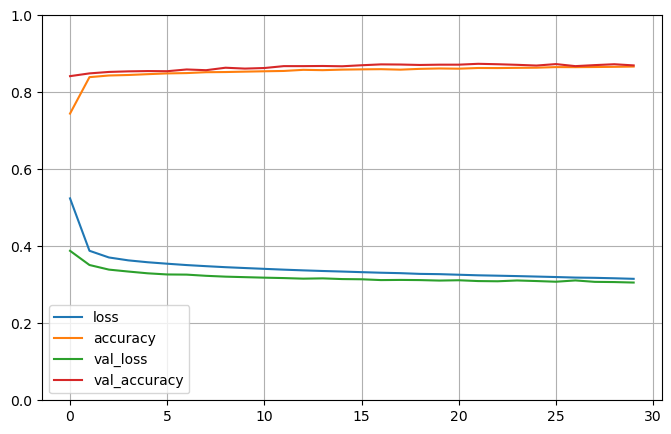

In [ ]:
import matplotlib.pyplot as plt

pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model1.evaluate(SMOTE_X_test, SMOTE_y_test)

83/83 [==============================] - 0s 2ms/step - loss: 0.3058 - accuracy: 0.8698


[0.3057853579521179, 0.8698112964630127]

In [ ]:
X_new = SMOTE_X_test[:3]
y_proba = model1.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 246ms/step


array([[1.  , 0.  ],
       [0.94, 0.06],
       [0.96, 0.04]], dtype=float32)

#### Second Model with Sigmoid Activation

Epoch 1/30
334/334 [==============================] - 2s 4ms/step - loss: 0.6904 - accuracy: 0.5102 - val_loss: 0.6856 - val_accuracy: 0.5479
Epoch 2/30
334/334 [==============================] - 1s 2ms/step - loss: 0.6810 - accuracy: 0.5879 - val_loss: 0.6761 - val_accuracy: 0.6547
Epoch 3/30
334/334 [==============================] - 1s 3ms/step - loss: 0.6708 - accuracy: 0.6615 - val_loss: 0.6650 - val_accuracy: 0.6487
Epoch 4/30
334/334 [==============================] - 1s 2ms/step - loss: 0.6587 - accuracy: 0.6877 - val_loss: 0.6504 - val_accuracy: 0.7453
Epoch 5/30
334/334 [==============================] - 1s 2ms/step - loss: 0.6430 - accuracy: 0.7314 - val_loss: 0.6321 - val_accuracy: 0.7743
Epoch 6/30
334/334 [==============================] - 1s 2ms/step - loss: 0.6232 - accuracy: 0.7611 - val_loss: 0.6087 - val_accuracy: 0.7974
Epoch 7/30
334/334 [==============================] - 1s 3ms/step - loss: 0.5986 - accuracy: 0.7820 - val_loss: 0.5802 - val_accuracy: 0.8075
Epoch 

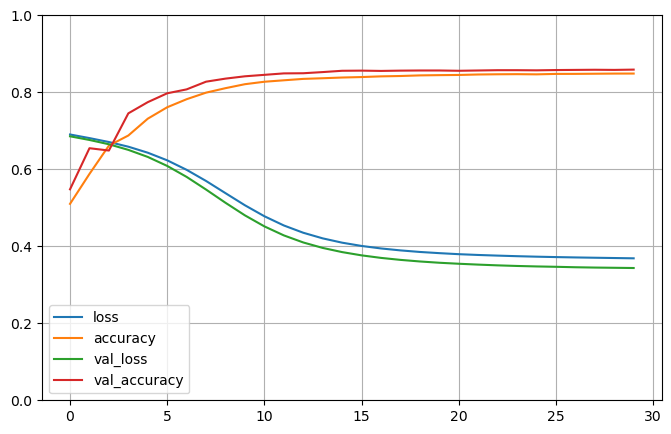

In [51]:
model2 = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[SMOTE_X_train.shape[1]]),
  keras.layers.Dense(10, activation="sigmoid"),
  keras.layers.Dense(8, activation="sigmoid"),
  keras.layers.Dense(2, activation="softmax")
])

model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history2 = model2.fit(SMOTE_X_train, SMOTE_y_train, epochs=30,
                    validation_data=(SMOTE_X_test, SMOTE_y_test))

pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

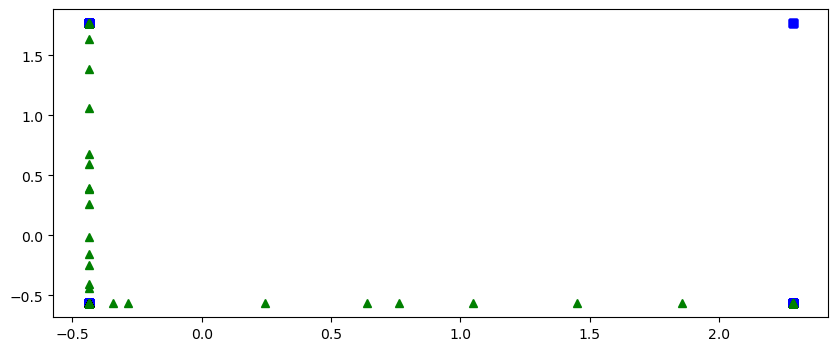

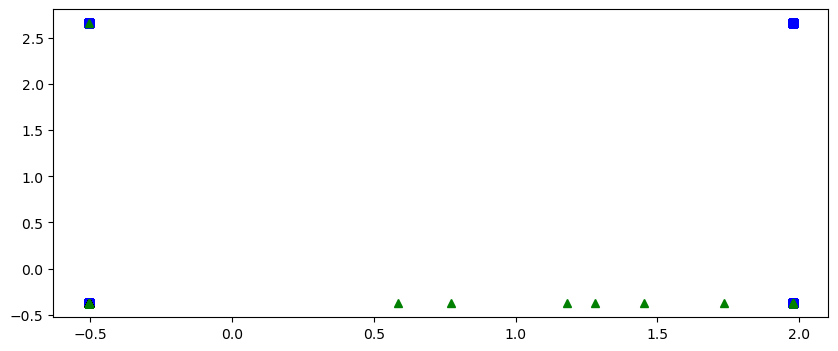

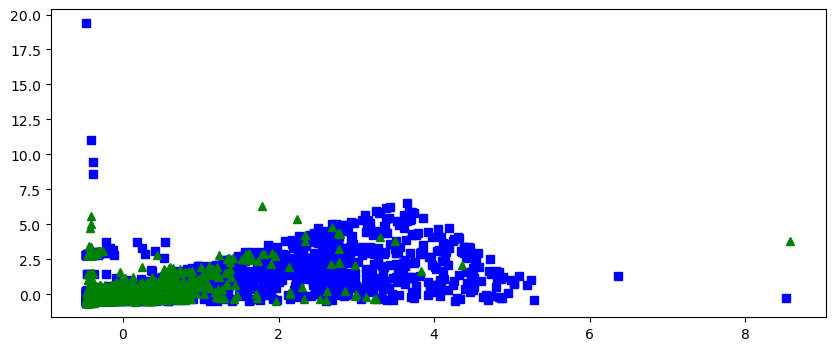

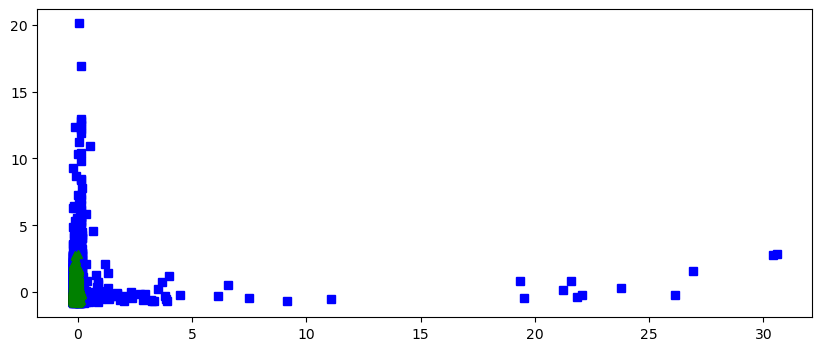

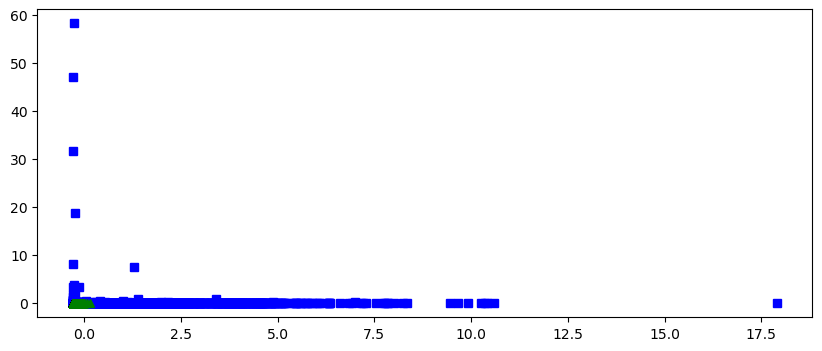

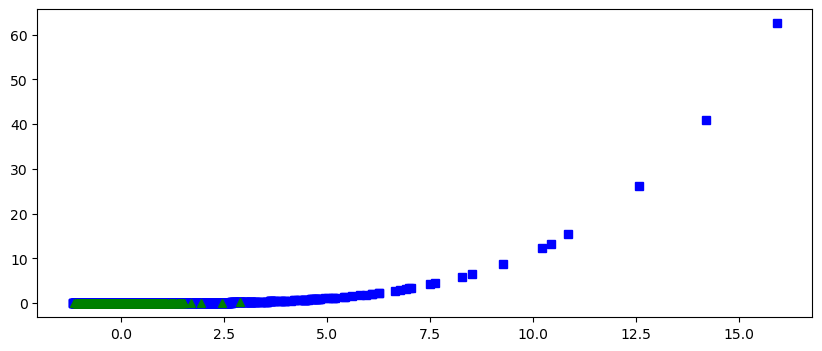

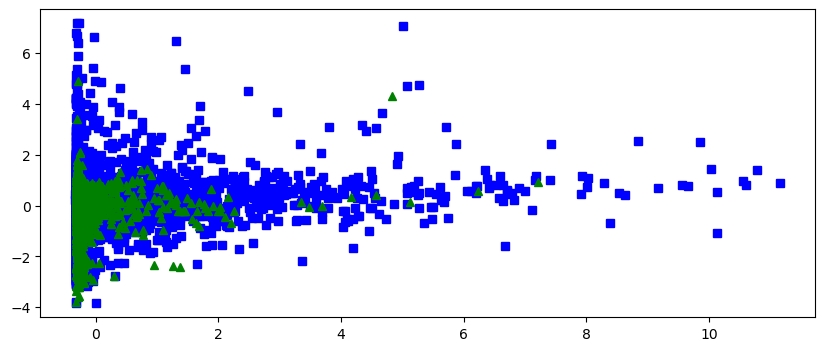

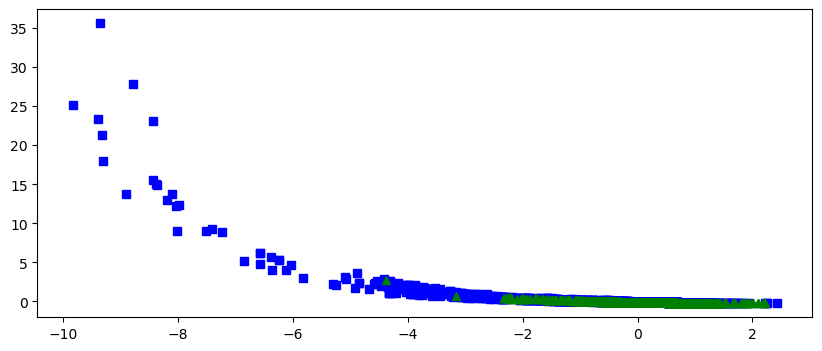

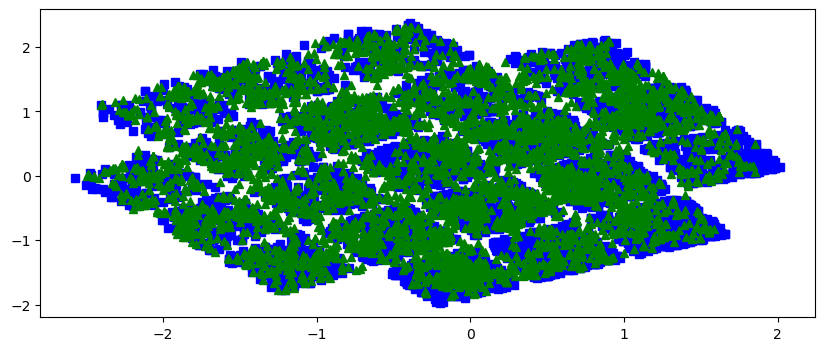

In [50]:
for i in range(0, SMOTE_X_train.shape[1] - 1, 2):  # Ensure i+2 does not exceed column count
   X_pair = SMOTE_X_train[:, i:i+2]
   plt.figure(figsize=(10, 4))
   plt.plot(X_pair[SMOTE_y_train == False, 0], X_pair[SMOTE_y_train == False, 1], "bs")
   plt.plot(X_pair[SMOTE_y_train == True, 0], X_pair[SMOTE_y_train == True, 1], "g^")
   plt.show()